In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from scipy.interpolate import interp1d
from sklearn.metrics import root_mean_squared_error as rmse

# Add stochastic Li models 
import sys
sys.path.append('../Script/')
from LithiumStochastic import  *

In [2]:
# Load New Li loess
target_df = pd.read_csv('../Output/Ordovician_Li_Loess.csv')
target_df.head()

# Store age and d7Li as dictionary
target_li = {
    'age' : target_df.Age.to_numpy(),
    'd7Li' : target_df.d7Li.to_numpy()+5.5
}

## Constrain in Hydrothermal FLux

In [3]:
fsr = pd.read_csv('../Data/Model/seafloor_production.csv')
fsr.head()

,age,fsr
0,550.0,0.800178
1,549.5,0.798341
2,549.0,0.796506
3,548.5,0.794672
4,548.0,0.792841


In [4]:
fsr['Fh'] = fsr['fsr'] * 13e9
fsr.head()

,age,fsr,Fh
0,550.0,0.800178,1.040231e+10
1,549.5,0.798341,1.037843e+10
2,549.0,0.796506,1.035457e+10
3,548.5,0.794672,1.033074e+10
4,548.0,0.792841,1.030693e+10


In [5]:
# Params
param = {
    'tmin' : 487,
    'tmax' : 455,
    'nt' : 500,

    'Fr' : [1e9, 11e9],
    'Rr' : [1, 30],
    'Fh' : [1e9, 11e9],
    'Rh' : [8, 8.1],
    'Fsed' : [1e9, 11e9],
    'Dsed' : [7.9, 8.1],
    'Falt' : [1e9, 11e9],
    'Dalt' : [1, 30],

    'sampling' : 10000
}

In [6]:
%%time
sol = run_sim(param, target_li, mode='hydrothermal_flux', 
              hydrothermal_flux=fsr['Fh'],
              hydrothermal_age=fsr['age'])

# unpack results
Fr = sol['Fr']
Rr = sol['Rr']
Fh = sol['Fh']
Rh = sol['Rh']
Fsed = sol['Fsed']
Dsed = sol['Dsed']
Falt = sol['Falt']
Dalt = sol['Dalt']
age = sol['age']

# Non-zeros mask to filter solutions
non_zero = np.where(Fr!=0)

# calculate mean and standard deviation of solutions
Fr_mean = np.zeros_like(age)
Fr_stdev = np.zeros_like(age)
Rr_mean = np.zeros_like(age)
Rr_stdev = np.zeros_like(age)

Fh_mean = np.zeros_like(age)
Fh_stdev = np.zeros_like(age)
Rh_mean = np.zeros_like(age)
Rh_stdev = np.zeros_like(age)

Fsed_mean = np.zeros_like(age)
Fsed_stdev = np.zeros_like(age)
Dsed_mean = np.zeros_like(age)
Dsed_stdev = np.zeros_like(age)

Falt_mean = np.zeros_like(age)
Falt_stdev = np.zeros_like(age)
Dalt_mean = np.zeros_like(age)
Dalt_stdev = np.zeros_like(age)

for i in range(len(age)):
    Fr_d = Fr[i,:]
    Rr_d = Rr[i,:]
    Fh_d = Fh[i,:]
    Rh_d = Rh[i,:]
    Fsed_d = Fsed[i,:]
    Dsed_d = Dsed[i,:]
    Falt_d = Falt[i,:]
    Dalt_d = Dalt[i,:]
    nz = np.where(Fr_d!=0)
    size = Fr_d[nz].size
    if size:
        Fr_mean[i] = np.mean(Fr_d[nz])
        Fr_stdev[i] = np.std(Fr_d[nz])
        Rr_mean[i] = np.mean(Rr_d[nz])
        Rr_stdev[i] = np.std(Rr_d[nz])

        Fh_mean[i] = np.mean(Fh_d[nz])
        Fh_stdev[i] = np.std(Fh_d[nz])
        Rh_mean[i] = np.mean(Rh_d[nz])
        Rh_stdev[i] = np.std(Rh_d[nz])

        Fsed_mean[i] = np.mean(Fsed_d[nz])
        Fsed_stdev[i] = np.std(Fsed_d[nz])
        Dsed_mean[i] = np.mean(Dsed_d[nz])
        Dsed_stdev[i] = np.std(Dsed_d[nz])

        Falt_mean[i] = np.mean(Falt_d[nz])
        Falt_stdev[i] = np.std(Falt_d[nz])
        Dalt_mean[i] = np.mean(Dalt_d[nz])
        Dalt_stdev[i] = np.std(Dalt_d[nz])

    else:
        Fr_mean[i] = np.nan
        Fr_stdev[i] = np.nan
        Rr_mean[i] = np.nan
        Rr_stdev[i] = np.nan

        Fh_mean[i] = np.nan
        Fh_stdev[i] = np.nan
        Rh_mean[i] = np.nan
        Rh_stdev[i] = np.nan

        Fsed_mean[i] = np.nan
        Fsed_stdev[i] = np.nan
        Dsed_mean[i] = np.nan
        Dsed_stdev[i] = np.nan

        Falt_mean[i] = np.nan
        Falt_stdev[i] = np.nan
        Dalt_mean[i] = np.nan
        Dalt_stdev[i] = np.nan

CPU times: total: 3.09 s
Wall time: 3.49 s


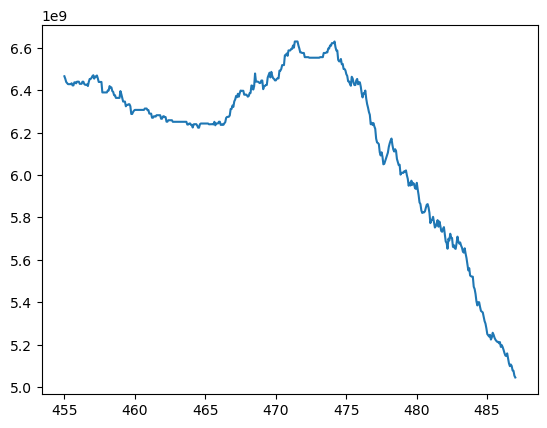

In [7]:
plt.plot(age, Fr_mean)

Text(0.5, 0, 'Age (Ma)')

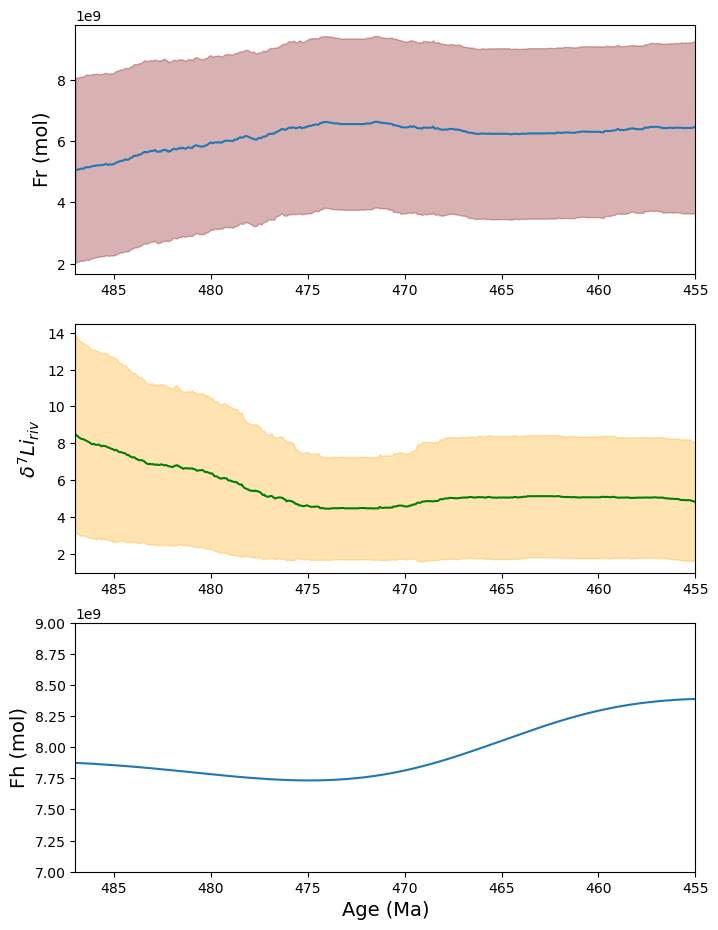

In [8]:
plt.figure(figsize=(8,11))

plt.subplot(311)
plt.plot(age, Fr_mean)
plt.fill_between(age, Fr_mean + Fr_stdev, Fr_mean - Fr_stdev,
                 color='maroon', alpha=0.3)

plt.ylabel('Fr (mol)', fontsize=14)
plt.xlim(487, 455)

plt.subplot(312)
plt.plot(age, Rr_mean, c='green')
plt.fill_between(age, Rr_mean + Rr_stdev, Rr_mean - Rr_stdev,
                 color='orange', alpha=0.3)

plt.ylabel(r'$\delta^7Li_{riv}$', fontsize=14)
plt.xlim(487, 455)

plt.subplot(313)
plt.plot(fsr['age'], fsr['Fh'])
plt.xlim(487, 455)
plt.ylim(7e9, 9e9)
plt.ylabel('Fh (mol)', fontsize=14)
plt.xlabel('Age (Ma)', fontsize=14)

In [9]:
def calc_Rsw_steady(Fr, Rr, Fh, Rh, Fsed, Dsed, Falt, Dalt):
    """Seawater d7Li at steady state
    
    Paramaters
    ----------
    Fr : float
        Riverine input flux
    Rr : float
        Riverine d7Li ratio
    Fh : float
        Hydrothermal input flux
    Rh : float
        Hydrothermal isotope ratio
    Fsed : float
        Lithium sink due to uptake onto marine sediments (Reverse Weathering)
    Falt : float
        Lithium sink due to alteration of oceanic crust
    
    Returns
    -------
    Rsw_ss : float
        Seawater d7Li ratio
    """
    Rsw_ss = (Fr*Rr + Rh*Fh + Dsed*Fsed + Falt*Dalt) / (Fsed + Falt)
    return Rsw_ss

In [10]:
Rsw_ss = calc_Rsw_steady(Fr_mean, Rr_mean, Fh_mean, Rh_mean, Fsed_mean, Dsed_mean, 
                         Falt_mean, Dalt_mean)

In [11]:
frac_Falt = Falt_mean/(Falt_mean + Fsed_mean)
frac_Fsed = Fsed_mean/(Falt_mean + Fsed_mean)

Falt_ss = frac_Falt*(Fr_mean+Fh_mean)
Fsed_ss = frac_Fsed*(Fr_mean+Fh_mean)

Rsw_steady = calc_Rsw_steady(Fr_mean, Rr_mean, Fh_mean, Rh_mean, Fsed_ss, Dsed_mean, 
                         Falt_ss, Dalt_mean)

In [12]:
locality = [ 'Ibex', 'Shingle Pass']

locality_unc = ['Antelope Range',
 'Meiklejohn Peak', 'Clear Spring', 'Germany Valley']

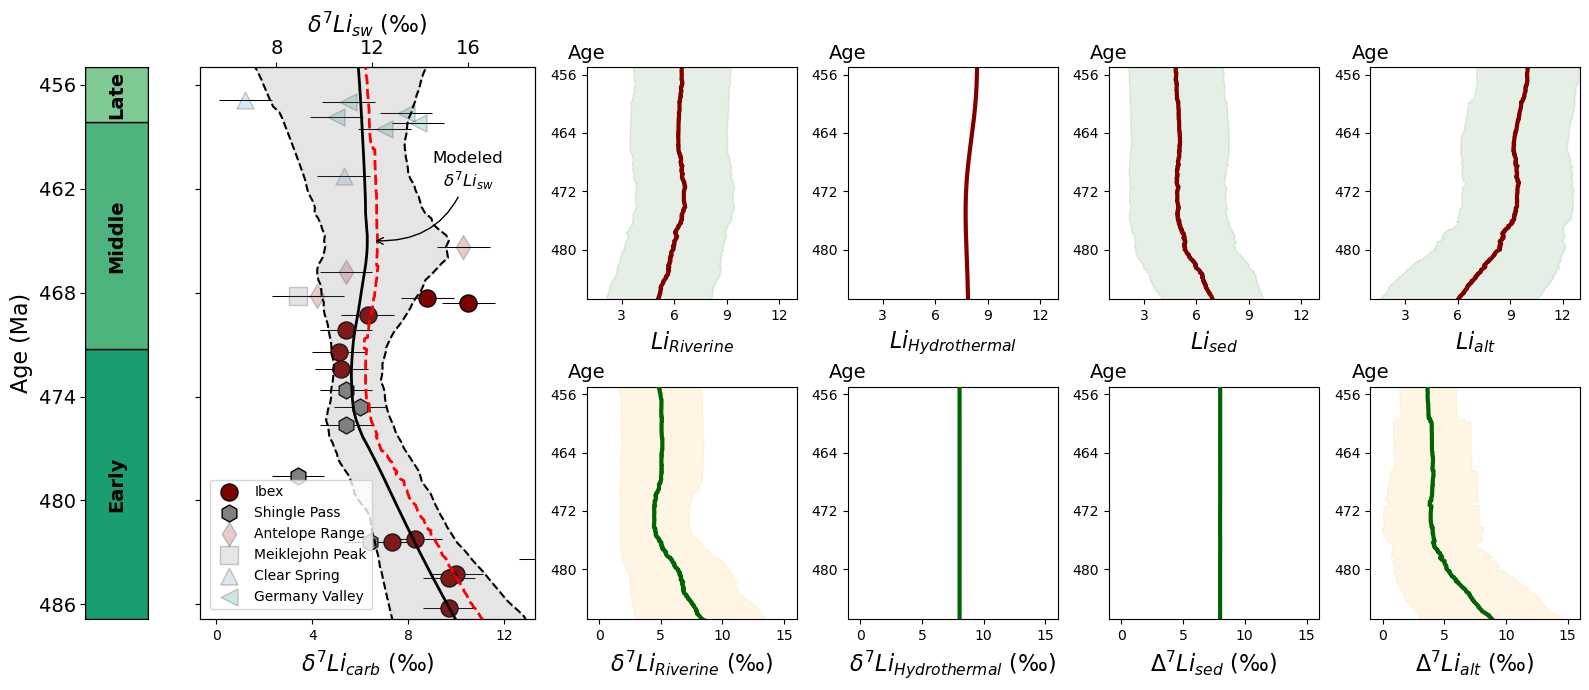

In [13]:
# Plotting
d7Li_df = pd.read_csv('../Data/Lithium/Ordovician_Lithium_Composite_Final.csv')
d7Li_loess_df = pd.read_csv('../Output/Ordovician_Li_Loess.csv')

# Bells and whistles for plotting
markers = ["o", "h", "^"]
colors = ['maroon', 'gray']

colors_unc = [ 'maroon', 'gray','steelblue', 'teal']
markers_unc = [ 'd', "s", "^", "<"]

ordo = pd.DataFrame({
    'epoch' : ['Early', 'Middle', 'Late'],
    'lower_boundary' : [486.85, 471.26, 458.18],
    'upper_boundary' : [471.26, 458.18, 455],
    'color' : ['#1A9D6F', '#4DB47E', '#7FCA93']
})

# Plotting Data
# Plot d7Li data
fig = plt.figure(figsize=(16, 7))

# width and height ratios
w = [0.3, 1.6, 1, 1, 1, 1 ]
h = [1, 1]

# Gridspec
gs = fig.add_gridspec(ncols=6, nrows=2, width_ratios=w, height_ratios=h)

# Axes
ax0 = fig.add_subplot(gs[0:,0])
ax = fig.add_subplot(gs[0:,1], sharey=ax0)

ax1 = fig.add_subplot(gs[0,2])
ax2 = fig.add_subplot(gs[1,2])

ax3 = fig.add_subplot(gs[0,3], sharey=ax1)
ax4 = fig.add_subplot(gs[1,3], sharey=ax2)

ax5 = fig.add_subplot(gs[0,4], sharey=ax1)
ax6 = fig.add_subplot(gs[1,4], sharey=ax2)

ax7 = fig.add_subplot(gs[0,5], sharey=ax1)
ax8 = fig.add_subplot(gs[1,5], sharey=ax2)

# Plot Ordovician Period
trans = ax0.get_yaxis_transform()
ordo['h'] = ordo['lower_boundary'] - ordo['upper_boundary']
rot = [90, 90, 90]
for ind in ordo.index:
    ax0.add_patch(Rectangle(xy=[0, ordo['upper_boundary'][ind]],
                            width=1,
                            height=ordo['h'][ind],
                            transform=trans, ec='black',
                            fc=ordo['color'][ind]))
    
    ax0.text(0.5, ordo['lower_boundary'][ind]-0.5*ordo['h'][ind], 
                str(ordo['epoch'][ind]), rotation=rot[ind],
                horizontalalignment='center', verticalalignment='center',
                transform = trans, fontsize=14, fontweight='bold')

# Plot d7Li data
for i, s in enumerate(locality):
    ax.scatter(d7Li_df['d7Li'].loc[d7Li_df.Locality == s], 
                d7Li_df['Age'].loc[d7Li_df.Locality == s],
                fc=colors[i],
                ec='k',
                s=150,
                marker=markers[i], label=s)

for i, s in enumerate(locality_unc):
    ax.scatter(d7Li_df['d7Li'].loc[d7Li_df.Locality == s], 
                d7Li_df['Age'].loc[d7Li_df.Locality == s],
                fc=colors_unc[i],
                ec='k',
                s=150,
                marker=markers_unc[i], label=s, alpha=0.2)

ax.legend(fontsize=10, loc='lower left', 
            bbox_to_anchor=(0.01, 0.005),
            title_fontsize=12)

ax.set_ylim(486.85, 455)

xmin = -0.7
xmax = 13.3
ax.set_xlim(xmin, xmax)

axt = ax.twiny()
axt.set_xlim(xmin+5.5, xmax+5.5)
axt.set_xlabel('$\delta^{7}Li_{sw}$ (‰)', fontsize=16)
axt.xaxis.set_major_locator(plt.MaxNLocator(4))
axt.tick_params(axis='x', labelsize=14)

ax.errorbar(d7Li_df['d7Li'], d7Li_df['Age'], xerr=1.1, fmt='none', ecolor='k',
             elinewidth=0.75, zorder=-3)

# Plot d7Li lowess
ax.plot(d7Li_loess_df['d7Li'], d7Li_loess_df['Age'], 'k-', lw=2, zorder=3)
ax.plot(d7Li_loess_df['upper95'], d7Li_loess_df['Age'], 'k--')
ax.plot(d7Li_loess_df['lower95'], d7Li_loess_df['Age'], 'k--')
ax.fill_betweenx(d7Li_loess_df['Age'], d7Li_loess_df['upper95'], 
                  d7Li_loess_df['lower95'], color='grey', alpha=0.2)

axt.plot(Rsw_ss, age, 'r--', lw=2, zorder=3)

ax0.tick_params(axis='x', bottom=False, labelbottom=False)
ax0.set_ylabel('Age (Ma)', fontsize=16)
ax0.yaxis.set_major_locator(plt.MaxNLocator(6))
ax0.tick_params(axis='y', labelsize=14)



ax.set_xlabel('$\delta^{7}Li_{carb}$ (‰)', fontsize=16)


# Model Results
# Plot Fr data
ax1.plot(Fr_mean/1e9, age, c='maroon', lw=3)
ax1.fill_betweenx(age, (Fr_mean + Fr_stdev)/1e9, (Fr_mean - Fr_stdev)/1e9,
                 color='darkgreen', alpha=0.1)
ax1.set_ylim(486.85, 455)
ax1.set_xlabel('$Li_{Riverine}$', fontsize=16)
# ax1.set_xlim(4e9, 9.5e9)


# Plot Rr data
ax2.plot(Rr_mean, age, lw=3, c='darkgreen', zorder=3)
ax2.fill_betweenx(age, Rr_mean + Rr_stdev, Rr_mean - Rr_stdev,
                 color='orange', alpha=0.1)
ax2.set_ylim(486.85, 455)
# ax2.set_xlim(7, 9)
ax2.set_xlabel('$\delta^7Li_{Riverine}$ (‰)', fontsize=16)


# Plot Fh
ax3.plot(Fh_mean/1e9, age, c='maroon', lw=3)
ax3.fill_betweenx(age, (Fh_mean + Fh_stdev)/1e9, (Fh_mean - Fh_stdev)/1e9,
                 color='darkgreen', alpha=0.1)
ax3.set_xlim(7e9, 9e9)
ax3.set_xlabel('$Li_{Hydrothermal}$', fontsize=16)

# Plot Rh data
ax4.plot(Rh_mean, age, lw=3, c='darkgreen', zorder=3)
ax4.fill_betweenx(age, Rh_mean + Rh_stdev, Rh_mean - Rh_stdev,
                 color='orange', alpha=0.1)
ax4.set_xlabel('$\delta^7Li_{Hydrothermal}$ (‰)', fontsize=16)
# ax4.set_xlim(3, 16)


# Plot Fsed
ax5.plot(Fsed_mean/1e9, age, c='maroon', lw=3)
ax5.fill_betweenx(age, (Fsed_mean + Fsed_stdev)/1e9,(Fsed_mean - Fsed_stdev)/1e9,
                 color='darkgreen', alpha=0.1)
# ax5.set_xlim(4e10, 7e10)
ax5.set_xlabel('$Li_{sed}$', fontsize=16)


# Plot Dsed data
ax6.plot(Dsed_mean, age, lw=3, c='darkgreen', zorder=3)
ax6.fill_betweenx(age, Dsed_mean + Dsed_stdev, Dsed_mean - Dsed_stdev,
                 color='orange', alpha=0.1)
ax6.set_xlabel('$\Delta^7Li_{sed}$ (‰)', fontsize=16)
# ax4.set_xlim(3, 16)


# Plot Falt
ax7.plot(Falt_mean/1e9, age, c='maroon', lw=3)
ax7.fill_betweenx(age, (Falt_mean + Falt_stdev)/1e9, (Falt_mean - Falt_stdev)/1e9,
                 color='darkgreen', alpha=0.1)
# ax7.set_xlim(5e10, 6e10)
ax7.set_xlabel('$Li_{alt}$', fontsize=16)


# Plot Dalt data
ax8.plot(Dalt_mean, age, lw=3, c='darkgreen', zorder=3)
ax8.fill_betweenx(age, Dalt_mean + Dalt_stdev, Dalt_mean - Dalt_stdev,
                 color='orange', alpha=0.1)
ax8.set_xlabel('$\Delta^7Li_{alt}$ (‰)', fontsize=16)


for axs in [ax]:
    axs.xaxis.set_major_locator(plt.MaxNLocator(4))
    axs.tick_params(axis='y', labelleft=False)
    

for axs in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    axs.xaxis.set_major_locator(plt.MaxNLocator(4))
    axs.yaxis.set_major_locator(plt.MaxNLocator(4))
    axs.set_ylabel('Age', fontsize=14, rotation=0)
    axs.yaxis.set_label_coords(0,1.02)

for axs in [ax2, ax4, ax6, ax8]:
    axs.set_xlim(-1, 16)

for axs in [ax1, ax3, ax5, ax7]:
    axs.set_xlim(1, 13)

# Annotation
axt.annotate("Modeled\n$\delta^7Li_{sw}$",
            xy=(12, 465), xycoords='data',
            xytext=(16, 461), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.4"))

fig.tight_layout()


plt.savefig('../Figure/Model_all.png', dpi=300)
plt.savefig('../Figure/Model_all.svg')

In [14]:
print("Riverine flux increase is {:.1f}%".format((Fr_mean.max() - Fr_mean.min())/Fr_mean.min() * 100))

Riverine flux increase is 31.4%


In [15]:
print("Hydrothermal flux increase is {:.1f}%".format((Falt_mean.max() - Falt_mean.min())/Falt_mean.min() * 100))

Hydrothermal flux increase is 67.4%


In [16]:
print("Riverine ratio decrease is {:.1f}‰".format((Rr_mean.max() - Rr_mean.min())))

Riverine ratio decrease is 4.1‰
